<a href="https://colab.research.google.com/github/ymuto0302/RW2025/blob/main/SVM_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVMを用いたIris / Moons データセットの分類と可視化

## 環境設定とデータ準備：

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# データセットの読み込みと前処理
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

moons = make_moons(n_samples=200, noise=0.15, random_state=42)
X_moons, y_moons = moons

# データの標準化
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)
X_moons_scaled = scaler.fit_transform(X_moons)

# データの分割
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris_scaled, y_iris, test_size=0.3, random_state=42)
X_moons_train, X_moons_test, y_moons_train, y_moons_test = train_test_split(X_moons_scaled, y_moons, test_size=0.3, random_state=42)

## SVMモデルの構築と評価（Irisデータセット）:

In [ ]:
def train_and_evaluate_svm(X_train, X_test, y_train, y_test, kernel, C=1.0, degree=3, gamma='scale'):
    svm = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    return svm

# 異なるカーネルでSVMを訓練・評価
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    train_and_evaluate_svm(X_iris_train, X_iris_test, y_iris_train, y_iris_test, kernel)

Kernel: linear, Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Kernel: poly, Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.96        13
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Kernel: rbf, Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.

## ハイパーパラメータCの影響分析:

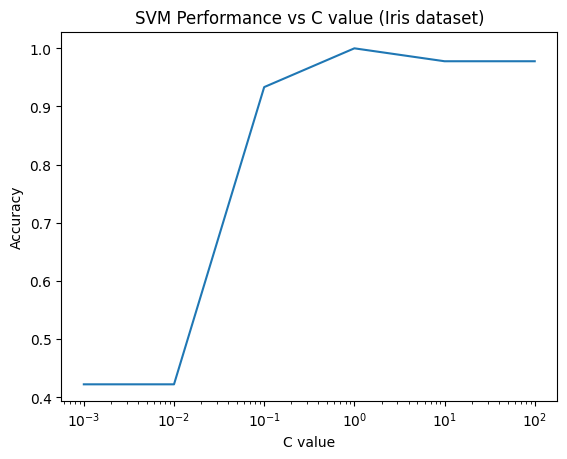

In [ ]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
accuracies = []

for C in C_values:
    svm = SVC(kernel='rbf', C=C)
    svm.fit(X_iris_train, y_iris_train)
    y_pred = svm.predict(X_iris_test)
    accuracies.append(accuracy_score(y_iris_test, y_pred))

plt.plot(C_values, accuracies)
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.title('SVM Performance vs C value (Iris dataset)')
plt.show()

## 非線形分離問題の解決（Moonsデータセット）:

Kernel: poly, Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.75      0.86        28

    accuracy                           0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.90      0.88      0.88        60

Kernel: poly, Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.75      0.86        28

    accuracy                           0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.90      0.88      0.88        60



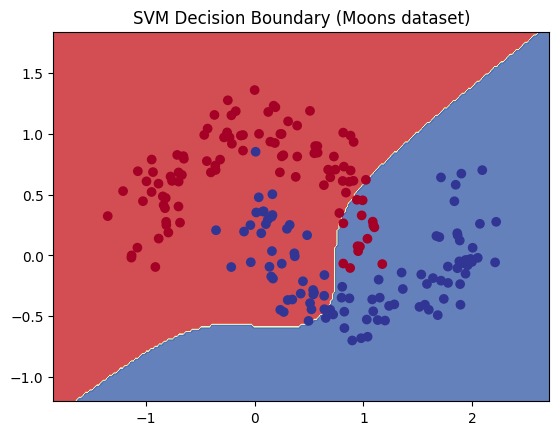

In [ ]:
import numpy as np

# Moonsデータセットに対するSVMの適用
train_and_evaluate_svm(X_moons_train, X_moons_test, y_moons_train, y_moons_test, 'poly', degree=3)

# 決定境界の可視化
def plot_decision_boundary(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.show()

svm_moons = train_and_evaluate_svm(X_moons_train, X_moons_test, y_moons_train, y_moons_test, 'poly', degree=3)
plot_decision_boundary(X_moons, y_moons, svm_moons, 'SVM Decision Boundary (Moons dataset)')